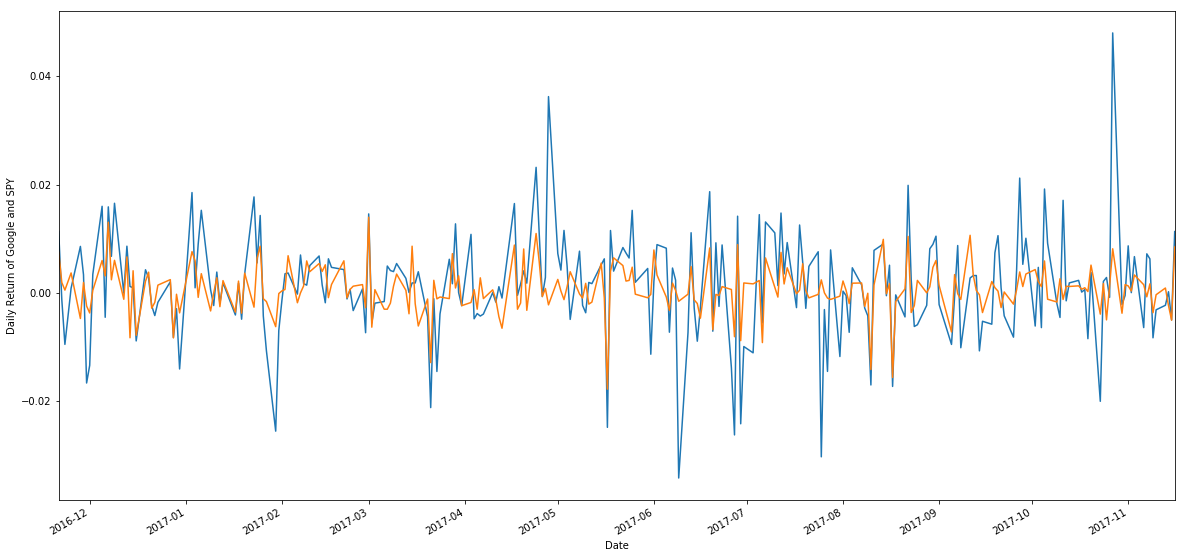

alpha0.000405280399854
beta1.26410429284


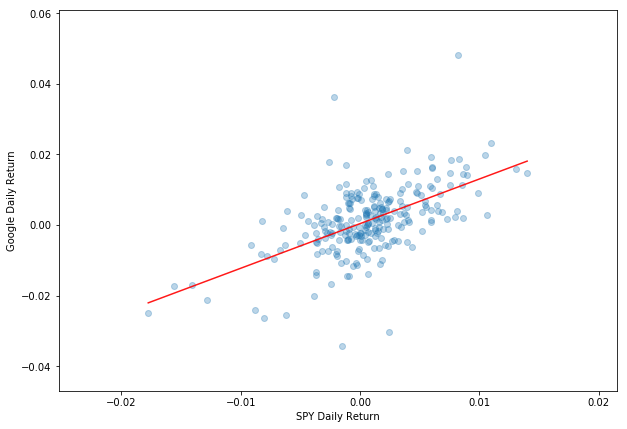

In [2]:
from pandas_datareader import data as d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

import statsmodels.api as sm
from statsmodels import regression 

goog = 'GOOG'
spy = 'SPY'

start_date = datetime.datetime(2012, 5, 18) 
end_date = datetime.datetime(2017, 11, 2)

df1 = d.get_data_google(goog,start_date,end_date)
df2 = d.get_data_google(spy,start_date,end_date)

return_goog = df1.Close.pct_change()[1:]
return_spy = df2.Close.pct_change()[1:]

plt.figure(figsize=(20,10))
return_goog.plot()
return_spy.plot()
plt.ylabel("Daily Return of Google and SPY")
plt.show()

X = return_spy.values
Y = return_goog.values

X = sm.add_constant(X)
model =  regression.linear_model.OLS(Y,X).fit()

X = X[:,1]

alpha = model.params[0]
beta = model.params[1]

print('alpha' + str(alpha))
print('beta' + str(beta))


X2 = np.linspace(X.min(),X.max(),100)
Y_hat = X2*beta + alpha 
plt.figure(figsize=(10,7))
plt.scatter(X,Y,alpha=0.3)
plt.xlabel("SPY Daily Return")
plt.ylabel("Google Daily Return")

plt.plot(X2,Y_hat,'r',alpha=.9)

plt.show()




